<a href="https://colab.research.google.com/github/melissa-aguiar/StochasticFilter/blob/main/Filtro_Casado_estocastico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Filtro Casado Estocastivo: 

- data: 19 de Março de 2021


# Importando bibliotecas e carregando arquivos


**Passo 1:** Importando as bibliotecas do python:

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import random
import csv

# Helper libraries
import os
import numpy as np
from sklearn.model_selection import KFold
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from plotly import graph_objects as go

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


**Passo 2:** Importando o google drive para o google colab:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Passo 3:** Carregando o arquivo de dados:

In [ ]:
smpsinal =np.load('/content/drive/MyDrive/Filtro_casado_estocastico/SmpSinal.npy')
smpruido =np.load('/content/drive/MyDrive/Filtro_casado_estocastico/SmpRuido.npy')
EneStile=np.load('/content/drive/MyDrive/Filtro_casado_estocastico/TileModSinal.npy')
EneRtile=np.load('/content/drive/MyDrive/Filtro_casado_estocastico/TileModRuido.npy')
EneStmdb_ch=np.load('/content/drive/MyDrive/Filtro_casado_estocastico/TMDBSinalCh.npy')
EneRtmdb_ch=np.load('/content/drive/MyDrive/Filtro_casado_estocastico/TMDBRuidoCh.npy')

#Filtro Casado Estocástico

##Pré-tratamento dos dados

### Formato do conjunto de dados

[Lado][Modulo][Canal][Amostra][Pulso] \\
smpsinal -> equivale ao L0C0M0 \\
smpruido -> equivale ao noiseL0C0M0


[Lado][Modulo][Canal][Pulso] \\
eneStmdb_ch -> equivale ao muonMa1 \\
eneRtmdb_ch -> equivale ao noiseMa1

In [ ]:
mod = 0
side = 1

###Calculando o pedestal para cada canal

In [ ]:
ped0 = 0
ped1 = 0
ped2 = 0
ped3 = 0

for i in range(50385):
  ped0 = ped0 + smpruido[side][mod][0][4][i]
  ped1 = ped1 + smpruido[side][mod][1][4][i]
  ped2 = ped2 + smpruido[side][mod][2][4][i]
  ped3 = ped3 + smpruido[side][mod][3][4][i]

ped0 = ped0/50385
ped1 = ped1/50385
ped2 = ped2/50385
ped3 = ped3/50385


###Separando os dados por canal

In [ ]:
ruido0 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpruido[side][mod][0][i][j])
  ruido0.append(aux)

ruido1 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpruido[side][mod][1][i][j])
  ruido1.append(aux)

ruido2 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpruido[side][mod][2][i][j])
  ruido2.append(aux)

ruido3 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpruido[side][mod][3][i][j])
  ruido3.append(aux)


sinal0 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpsinal[side][mod][0][i][j])
  sinal0.append(aux)

sinal1 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpsinal[side][mod][1][i][j])
  sinal1.append(aux)

sinal2 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpsinal[side][mod][2][i][j])
  sinal2.append(aux)

sinal3 = []
for j in range(50385):
  aux = []
  for i in range(7):
    aux.append(smpsinal[side][mod][3][i][j])
  sinal3.append(aux)


###Separando o conjunto de dados para treino (80%) e para teste (20%)

In [ ]:
ruidoDes0 = ruido0[0:40307][:]
ruidoTes0 = ruido0[40308:50385][:]
sinalDes0 = sinal0[0:40307][:]
sinalTes0 = sinal0[40308:50385][:]

ruidoDes1 = ruido1[0:40307][:]
ruidoTes1 = ruido1[40308:50385][:]
sinalDes1 = sinal1[0:40307][:]
sinalTes1 = sinal1[40308:50385][:]

ruidoDes2 = ruido2[0:40307][:]
ruidoTes2 = ruido2[40308:50385][:]
sinalDes2 = sinal2[0:40307][:]
sinalTes2 = sinal2[40308:50385][:]

ruidoDes3 = ruido3[0:40307][:]
ruidoTes3 = ruido3[40308:50385][:]
sinalDes3 = sinal3[0:40307][:]
sinalTes3 = sinal3[40308:50385][:]


###Retirando o pedestal e separando os dados por módulo

In [ ]:
ruidoDes0 = np.array(ruidoDes0)
ruidoTes0 = np.array(ruidoTes0)
sinalDes0 = np.array(sinalDes0)
sinalTes0 = np.array(sinalTes0)

ruidoDes1 = np.array(ruidoDes1)
ruidoTes1 = np.array(ruidoTes1)
sinalDes1 = np.array(sinalDes1)
sinalTes1 = np.array(sinalTes1)

ruidoDes2 = np.array(ruidoDes2)
ruidoTes2 = np.array(ruidoTes2)
sinalDes2 = np.array(sinalDes2)
sinalTes2 = np.array(sinalTes2)

ruidoDes3 = np.array(ruidoDes3)
ruidoTes3 = np.array(ruidoTes3)
sinalDes3 = np.array(sinalDes3)
sinalTes3 = np.array(sinalTes3)

ruidoDes0 = ruidoDes0 - ped0
ruidoTes0 = ruidoTes0 - ped0
sinalDes0 = sinalDes0 - ped0
sinalTes0 = sinalTes0 - ped0

ruidoDes1 = ruidoDes1 - ped1
ruidoTes1 = ruidoTes1 - ped1
sinalDes1 = sinalDes1 - ped1
sinalTes1 = sinalTes1 - ped1

ruidoDes2 = ruidoDes2 - ped2
ruidoTes2 = ruidoTes2 - ped2
sinalDes2 = sinalDes2 - ped2
sinalTes2 = sinalTes2 - ped2

ruidoDes3 = ruidoDes3 - ped3
ruidoTes3 = ruidoTes3 - ped3
sinalDes3 = sinalDes3 - ped3
sinalTes3 = sinalTes3 - ped3

ruidoDes = ruidoDes0 + ruidoDes1 + ruidoDes2 + ruidoDes3
ruidoTes = ruidoTes0 + ruidoTes1 + ruidoTes2 + ruidoTes3
sinalDes = sinalDes0 + sinalDes1 + sinalDes2 + sinalDes3
sinalTes = sinalTes0 + sinalTes1 + sinalTes2 + sinalTes3


##Matriz de covariância e branqueamento

###Matriz de covariância do ruído antes do branqueamento

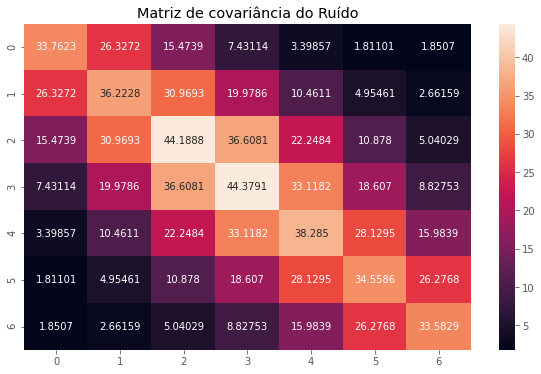

In [ ]:
c = np.cov(ruidoDes.T, bias=True)  ## só dá certo se fizer transposto
plt.figure(figsize = (10, 6))
sns.heatmap(c, annot=True, fmt='g')
plt.title("Matriz de covariância do Ruído")
plt.show()

###Matriz de branqueamento

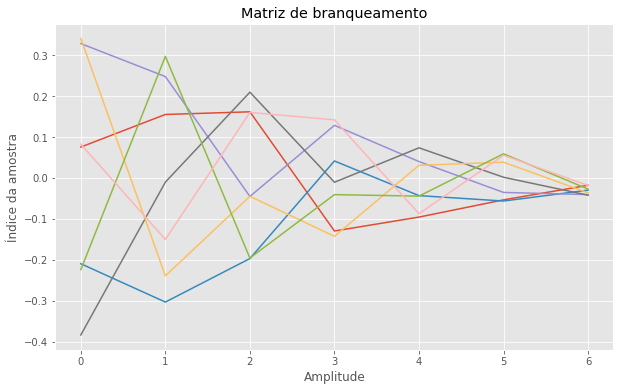

In [ ]:
D, V = np.linalg.eig(c)

# reordenando autovalores e autovetores pra ficar igual ao matlab
indices = np.argsort(D)
D = D[indices]
D = D.real
V = V[:, indices]

D = D**(-0.5) # esta é a primeira parte do calculo do W
D = D*np.identity(7) # agrupei o array D em uma matriz diagonal

W = np.matmul(D,V.T) # produto matricial

plt.style.use("ggplot")
plt.figure(figsize = (10, 6))
plt.plot(W)
plt.title("Matriz de branqueamento")
plt.xlabel("Amplitude")
plt.ylabel("Índice da amostra")
plt.show()


###Matriz de covariância do ruído depois do branqueamento

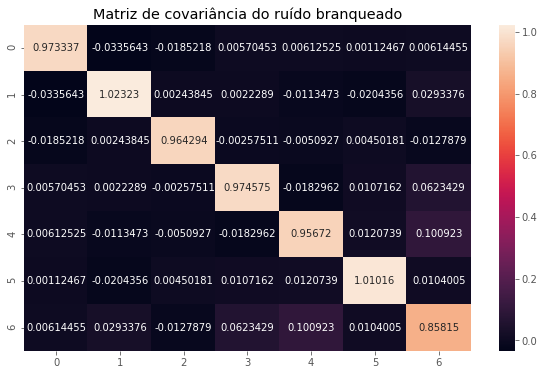

In [ ]:
ruidoBran = np.matmul(ruidoTes,W.T)
c2 = np.cov(ruidoBran.T, bias=True)  ## só dá certo se fizer transposto
plt.figure(figsize = (10, 6))
sns.heatmap(c2, annot=True, fmt='g')
plt.title("Matriz de covariância do ruído branqueado")
plt.show()

##Fazendo corte de energia < 1GeV e normalizando

### Filtrando os dados

In [ ]:
FsinalDes0 = []

for i in range(len(sinalDes0)):
  if EneStmdb_ch[side][mod][0][i]>1000:
    FsinalDes0.append(sinalDes0[i][:])

FsinalDes1 = []

for i in range(len(sinalDes1)):
  if EneStmdb_ch[side][mod][1][i]>1000:
    FsinalDes1.append(sinalDes1[i][:])

FsinalDes2 = []

for i in range(len(sinalDes2)):
  if EneStmdb_ch[side][mod][2][i]>1000:
    FsinalDes2.append(sinalDes2[i][:])

FsinalDes3 = []

for i in range(len(sinalDes3)):
  if EneStmdb_ch[side][mod][3][i]>1000:
    FsinalDes3.append(sinalDes3[i][:])

N = min(len(FsinalDes0), len(FsinalDes1), len(FsinalDes2), len(FsinalDes3)) # esse vai ser o indice pra somar os 4 canais

F = np.zeros((N,7))

for j in range(N):
  for i in range(7):
    F[j][i] = FsinalDes0[j][i] + FsinalDes1[j][i] + FsinalDes2[j][i] + FsinalDes3[j][i]

NF = F

for i in range(len(F)):
  div = max(F[i])
  for j in range(7):
    NF[i][j] = F[i][j]/div


### Obtendo o pulso médio normalizado

In [ ]:
a0 = 0
a1 = 0
a2 = 0
a3 = 0
a4 = 0
a5 = 0
a6 = 0

for i in range(len(NF)):
  a0 = a0 + NF[i][0]
  a1 = a1 + NF[i][1]
  a2 = a2 + NF[i][2]
  a3 = a3 + NF[i][3]
  a4 = a4 + NF[i][4]
  a5 = a5 + NF[i][5]
  a6 = a6 + NF[i][6]

a0 = a0/len(NF)
a1 = a1/len(NF)
a2 = a2/len(NF)
a3 = a3/len(NF)
a4 = a4/len(NF)
a5 = a5/len(NF)
a6 = a6/len(NF)

sm = []

sm.append(a0)
sm.append(a1)
sm.append(a2)
sm.append(a3)
sm.append(a4)
sm.append(a5)
sm.append(a6)

div = max(sm)
for i in range(7):
  sm[i] = sm[i]/div


## Calculando a PCA

###Função pra PCA

In [ ]:
from numpy import mean,cov,double,cumsum,dot,linalg,array
from pylab import plot,subplot,axis,stem,show,figure

def pca(A):
 """ performs principal components analysis 
     (PCA) on the n-by-p data matrix A
     Rows of A correspond to observations, columns to variables. 

 Returns :  
  coeff :
    is a p-by-p matrix, each column containing coefficients 
    for one principal component.
  score : 
    the principal component scores; that is, the representation 
    of A in the principal component space. Rows of SCORE 
    correspond to observations, columns to components.
  latent : 
    a vector containing the eigenvalues 
    of the covariance matrix of A.
 """
 # computing eigenvalues and eigenvectors of covariance matrix
 M = (A-mean(A.T,axis=1)).T # subtract the mean (along columns)
 [latent,coeff] = linalg.eig(cov(M)) # attention:not always sorted

 # reordenando autovalores e autovetores
 indices = np.argsort(latent)
 latent = latent[indices]
 latent = latent[::-1]
 coeff = coeff[:, indices]


 score = dot(coeff.T,M) # projection of the data in the new space
 return coeff,score,latent

###Obtenção dos sinais médios e plot

In [ ]:

pca_data = np.matmul(NF, W.T)

coeff, score, latent = pca(pca_data) # antes tava usando pca_data, mas só NF fica com Ir melhor

N = 7

mFC = np.matmul(sm, W.T) # ficou igual ao matlab (mudou o sinal da ultima componente)

mEstimacao = np.matmul(mFC, coeff)


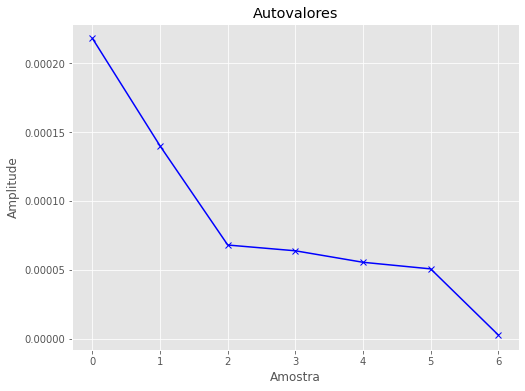

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (8, 6))
plt.plot(latent,'-xb')
plt.title("Autovalores")
plt.xlabel("Amostra")
plt.ylabel("Amplitude")
plt.show()

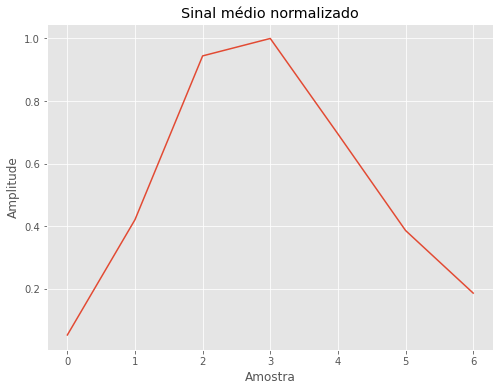

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (8, 6))
plt.plot(sm)
plt.title("Sinal médio normalizado")
plt.xlabel("Amostra")
plt.ylabel("Amplitude")
plt.show()


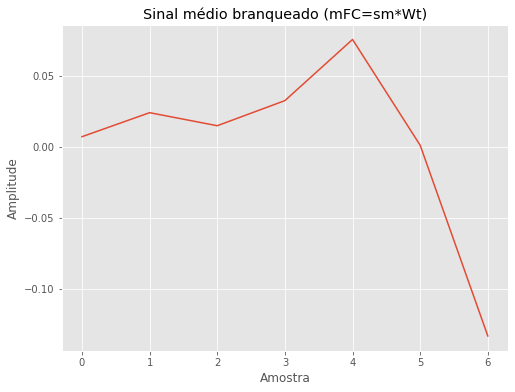

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (8, 6))
plt.plot(mFC)
plt.title("Sinal médio branqueado (mFC=sm*Wt)")
plt.xlabel("Amostra")
plt.ylabel("Amplitude")
plt.show()


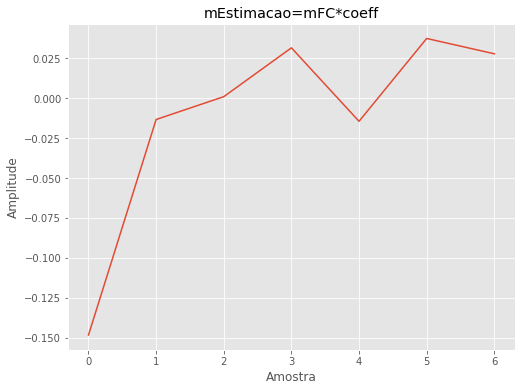

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (8, 6))
plt.plot(mEstimacao)
plt.title("mEstimacao=mFC*coeff")
plt.xlabel("Amostra")
plt.ylabel("Amplitude")
plt.show()

##   Parâmetros do filtro

In [ ]:
rRuido = np.matmul(ruidoTes, W.T)
rRuido = np.matmul(rRuido, coeff)

rSinal = np.matmul(sinalTes, W.T)
rSinal = np.matmul(rSinal, coeff)

variancia = np.var(ruidoDes)

No = variancia*2

lbd = latent

h1 = np.zeros((7,7), dtype=float) 
h2 = np.zeros((7,7), dtype=float) 

aux1 = []
aux2 = []

for i in range(N):# de 1 ate o numero de pca
    h1 = h1 + (lbd[i]/(lbd[i] + variancia)) * np.matmul(np.transpose(np.matrix(coeff[:][i])), np.matrix(coeff[:][i]))
    h2 = h2 + (1/(lbd[i] + variancia)) * np.matmul(np.transpose(np.matrix(coeff[:][i])), np.matrix(coeff[:][i]))


## Cálculo das componentes do filtro

Componente estocástica

In [ ]:
IrRuido = np.zeros((len(ruidoTes),1), dtype=float) 
IrSinal = np.zeros((len(ruidoTes),1), dtype=float) 

for ev in range(len(ruidoTes)):
  aux = np.transpose(np.matmul(rRuido[ev][:] , np.matrix(coeff[:][0:N])))
  IrRuido[ev] = (1/No)*(np.matmul(np.matmul(rRuido[ev][:] , np.matrix(coeff[:][0:N])) , np.matmul(h1 , aux)))

for ev in range(len(sinalTes)):
  aux = np.transpose(np.matmul(rSinal[ev][:] , np.matrix(coeff[:][0:N])))
  IrSinal[ev] = (1/No)*(np.matmul(np.matmul(rSinal[ev][:] , np.matrix(coeff[:][0:N])) , np.matmul(h1 , aux)))


Componente determinística

In [ ]:
IdRuido = np.zeros((len(ruidoTes),1), dtype=float) 
IdSinal = np.zeros((len(ruidoTes),1), dtype=float)

for ev in range(len(ruidoTes)):
  aux = np.transpose(np.matmul(rRuido[ev][:] , np.matrix(coeff[:][0:N])))
  IdRuido[ev] = np.matmul(np.matmul(mEstimacao , np.matrix(coeff[:][0:N])) , np.matmul(h2 , aux))

for ev in range(len(sinalTes)):
  aux = np.transpose(np.matmul(rSinal[ev][:] , np.matrix(coeff[:][0:N])))
  IdSinal[ev] = np.matmul(np.matmul(mEstimacao , np.matrix(coeff[:][0:N])) , np.matmul(h2 , aux))

FCestRuido = IdRuido + IrRuido
FCestSinal = IdSinal + IrSinal

#Curva ROC

## Função pra curva ROC

In [ ]:
def roc(pontos, sinal, ruido):
  """ calcula os parametros da curva ROC
  (Receiver Operating Characteristic Curve)

 Retorna :  
  FA :
    falso alarme
  PD :
    probabilidade de detecção
  
  """
  pmin = min(ruido)
  pmax = max(sinal)

  psoma = (pmax+abs(pmin))/pontos
  patamar = pmin
  PD = []
  FA = []
  pd = 0
  fa = 0

  for i in range(pontos):
    for j in range(len(ruido)):
      if sinal[j] > patamar:
        pd = pd + 1
      if ruido[j] > patamar:
        fa = fa + 1
    
    pd = pd*100/len(sinal)
    fa = fa*100/len(ruido)
    PD.append(pd)
    FA.append(fa)
    pd = 0
    fa = 0
    patamar = patamar + psoma

  return FA, PD



##Curva ROC do Filtro Casado Estocástico

Parâmetros

In [ ]:
FA1, PD1 = roc(500, FCestSinal, FCestRuido)

Gráfico

Text(0, 0.5, 'Probabilidade de Detecção')

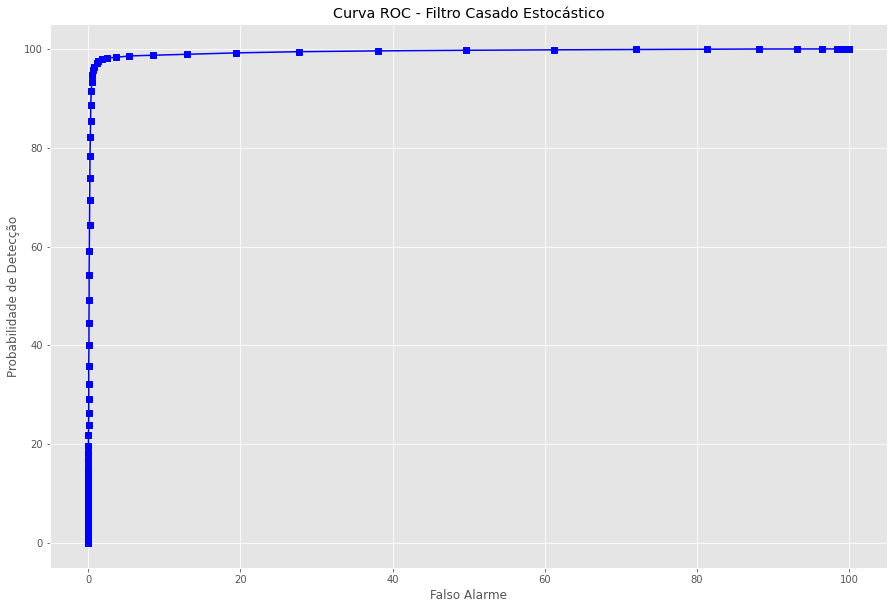

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 10))
plt.plot(FA1, PD1, 'bs-')
plt.title("Curva ROC - Filtro Casado Estocástico")
plt.xlabel("Falso Alarme")
plt.ylabel("Probabilidade de Detecção")

## Curva ROC do Filtro Casado

Gerando os sinais antes do plot e calculando parâmetros

In [ ]:
FcSinal = []
FcRuido = []

for j in range(50385):
  FcSinal.append(EneStmdb_ch[0][0][0][j] + EneStmdb_ch[0][0][1][j] + EneStmdb_ch[0][0][2][j] + EneStmdb_ch[0][0][3][j])
  FcRuido.append(EneRtmdb_ch[0][0][0][j] + EneRtmdb_ch[0][0][1][j] + EneRtmdb_ch[0][0][2][j] + EneRtmdb_ch[0][0][3][j])

FA2, PD2 = roc(500, FcSinal, FcRuido)

Plotando a curva

Text(0, 0.5, 'Probabilidade de Detecção')

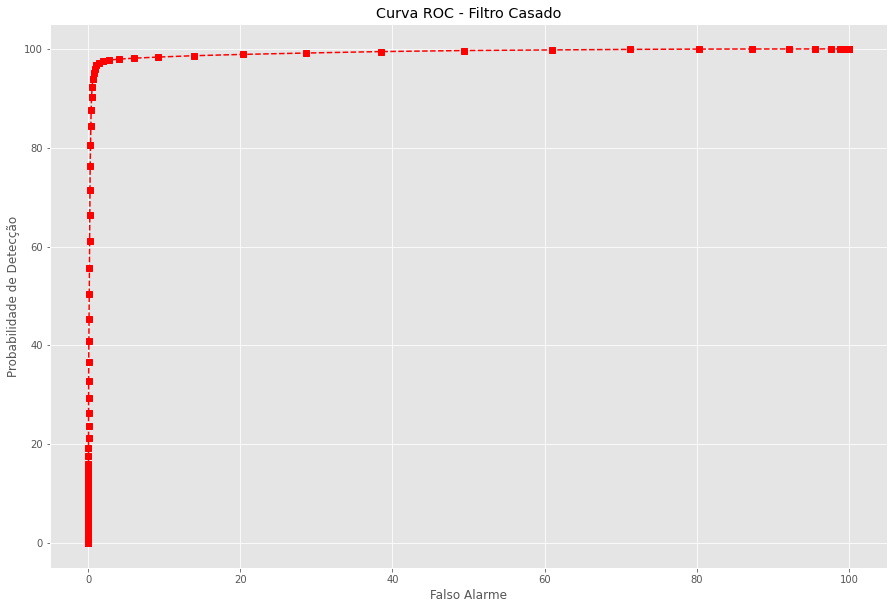

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (15, 10))
plt.plot(FA2, PD2, 'rs--')
plt.title("Curva ROC - Filtro Casado")
plt.xlabel("Falso Alarme")
plt.ylabel("Probabilidade de Detecção")

## Curva ROC das componentes Id e Ir do Filtro Estocástico

In [ ]:
FA3, PD3 = roc(1000, IrSinal, IrRuido)
FA4, PD4 = roc(1000, IdSinal, IdRuido)

figEst = go.Figure(data=go.Scatter(y=PD3,x=FA3,name="Ir"))
figEst.add_scatter(y=PD4,x=FA4,name="Id")
figEst.add_scatter(y=PD1,x=FA1,name="Id + Ir")
figEst.update_layout(title_text="ROC Curve - Stochastic Matched Filter")

figEst.show()

##Curva ROC - Comparação

In [ ]:
figComp = go.Figure(data=go.Scatter(y=PD2,x=FA2,name="Matched Filter"))
figComp.add_scatter(y=PD1,x=FA1,name="Stochastic Matched Filter")
figComp.add_scatter(y=PD4,x=FA4,name="Id")
figComp.update_layout(title_text="ROC Curve - Analysis")

figComp.show()
